## 1. Televisión, Espectáculos de Medio Tiempo y el Gran Juego

<p><b>Aclaración:</b> El contenido de esta <em>notebook</em> es de autoría y ha sido diseñado por <a href="https://www.linkedin.com/in/davidventuri/">David Venturi</a> - Gerente de Currículo en DataCamp. Después de especializarse en Ingeniería Química y Economía, David creó un programa de maestría de ciencia de datos personalizado utilizando recursos en línea. Ha estudiado cientos de cursos en línea y ha creado varios.</p>
<p>Ya sea que te guste o no el fútbol americano, el Super Tazón es un espectáculo. Hay un poquito para todos en la fiesta del Super Tazón. Drama en la forma de grandes derrotas, remontadas y controversia para los fanáticos del deporte. También están los anuncios ridículamente caros, algunos graciosos, otros desgarradores, provocadores y raros. El show de medio tiempo con el músico más grande del mundo, algunas veces <a href="https://youtu.be/ZD1QrIe--_Y?t=14">montando tigres mecánicos gigantes</a> o <a href="https://youtu.be/mjrdywp5nyE?t=62">saltando desde el techo del estadio</a>. Es un show. Y en esta <i>notebook</i>, vamos a encontrar cómo algunos de los elementos de este show interactúan unos con otros. Después de explorar y limpiar un poco nuestros datos, responderamos preguntas como:</p>

<ul>
    <li> ¿Cuáles son los resultados más extremos? </li>
    <li> ¿Cómo el juego afecta la audiencia televisiva? </li>
    <li> ¿Como la audiencia, los ratings de TV, y los costos de los anuncios evolucionan a través del tiempo?</li>
    <li> ¿Quienes son los músicos más prolificos en términos de los espectáculos de medio tiempo?</li>
</ul>

<p>El dataset que utilizaremos fue <a href="https://en.wikipedia.org/wiki/Web_scraping">construido</a> y pulido de Wikipedia. Esta compuesto de tres archivos CSV, uno con <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">datos de juego</a>, otro con <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">datos de TV</a> y otro con <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">datos de los músicos de medio tiempo</a> para todos los 52 Super Tazones hasta 2018. Echemos un vistazo, utilizando <code>display()</code> en lugar de <code>print()</code> dado que su resultado es más vistoso en las notebooks de Jupyter.

In [1]:
# Importar pandas
import pandas as pd

# Cargar los archivos CSV a los DataFrames
super_tazones = pd.read_csv('DATASETS/SUPER_TAZONES.csv')
tv = pd.read_csv('DATASETS/TV.csv')
musicos_mediotiempo = pd.read_csv('DATASETS/MUSICOS_MEDIOTIEMPO.csv')

# Mostremos las cinco (5) primeras filas de cada DataFrame
display(super_tazones.head())
display(tv.head())
display(musicos_mediotiempo.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Tomando nota de los problemas de los datasets

<p>Para los datos de los juegos del Super Tazón, podemos ver que el conjunto de datos parece completo excepto por los valores faltantes en las columnas de mariscales de campo de respaldo (backup quaterback) (<code>qb_winner_2</code>) y (<code>qb_loser_2</code>), lo que tiene sentido dado que la mayoría de los mariscales de campo iniciales en el Super Tazón (<code>qb_winner_1</code>) y (<code>qb_loser_1</code>) juegan todo el partido.</p>
<p>Al inspeccionar visualmente los datos de tv y músicos de medio tiempo, solo se puede observar un valor faltante, pero la corazonada nos dice que puede haber más. El Super Tazón se remonta a 1967, y las columnas más granulares (por ejemplo, el número de canciones por músico de medio tiempo) probablemente no fueron registradas de forma confiable a través del tiempo. Wikipedia es genial pero no es perfecto.</p>
<p>Una inspección del resultado de <code>info()</code> para <code>tv</code> y <code>musicos_mediotiempo</code> nos muestra que hay múltiples columnas con valores nulos:

In [2]:
# Resumen de los datos de televisión a inspeccionar
tv.info()

print('\n') # imprimir una linea en blanco para espaciar el siguiente resultado

# Resumen de los datos de musicos de medio tiempo a inspeccionar
musicos_mediotiempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


## 3. Distribución de puntos combinados

<p>Para los datos de TV, las siguientes columnas tienen valores faltantes:</p>
<ul>
    <li><code>total_us_viewers</code> (cantidad de televidentes estadounidenses que vieron al menos alguna parte de la transmisión)</li>
    <li><code>rating_18_49</code> (porcentaje promedio de adultos estadounidenses que viven en un hogar con una TV y que estaban viendo la transmisión completa)</li>
    <li><code>share_18_49</code> (porcentaje promedio de adultos estadounidenses que viven en un hogar con una TV <em>en uso</em> y que estaban viendo la transmisión completa)</li>
</ul>
<p>Para los datos de músicos de medio tiempo, existen números faltantes de canciones interpretadas (<code>num_songs</code>) para aproximadamente un tercio de las actuaciones.</p>
<p>Existen muchas razones potenciales para estos valores faltantes. ¿Se rastrearon los datos alguna vez?, ¿Se perdieron en la historia?, ¿Vale la pena hacer un esfuerzo para completar estos datos? Posiblemente. Ver cada espectáculo de medio tiempo del Super Tazón para obtener el conteo de canciones sería bastante divertido. Pero no tenemos el tiempo para hacer ese tipo de cosas ahora! Tomemos nota de donde los datos son imperfectos y empecemos a descurbrir algunas ideas.</p>
<p>Empecemos mirando los puntos combinados de cada Super Tazón al visualizar su distribución. Tambien señalemos los juegos con mayores y menores puntajes.</p>

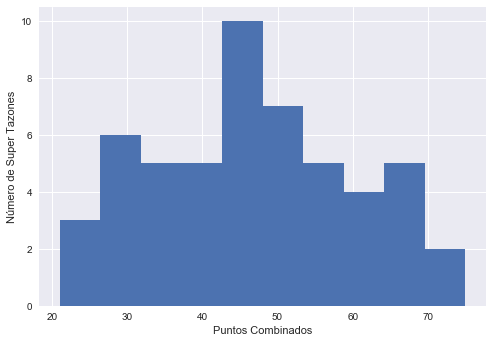

In [3]:
# Importar matplotlib y configurar el estilo de trazado
from matplotlib import pyplot as plt
# Visualizar graficos sin plt.show()
%matplotlib inline 
# Estilo de trazado
plt.style.use('seaborn')

#Graficar un histograma de puntos combinados
plt.hist(super_tazones['combined_pts'])
plt.xlabel('Puntos Combinados')
plt.ylabel('Número de Super Tazones')
plt.show()

In [4]:
# Mostrar los Super Tazones con los puntajes cominados más altos y más bajos
display(super_tazones[super_tazones['combined_pts']>70])
display(super_tazones[super_tazones['combined_pts']<25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


## 4. Distribución de diferencia de puntos

<p> La mayoría de los puntajes combinados son alrededor de 40-50 puntos, con los extremos a una distancia aproximadamente igual en direcciones opuestas. Subiendo a los puntajes combinados más altos en 74 y 75, encontramos dos juegos con actuaciones dominantes de mariscal de campo. Uno incluso sucedió recientemente en el LII Super Tazon de 2018, donde los Patriots de Tom Brady perdieron ante el desvalido Eagles 41-33 de Nick Foles para un puntaje combinado de 74. </p>

<p> Bajando a los puntajes combinados más bajos, tenemos el III y VII Super Tazón, que presentaron defensas duras que dominaron. También tenemos el IX Super Tazón en Nueva Orleans en 1975, cuyo puntaje de 16-6 se puede atribuir al mal tiempo. El campo estaba resbaladizo por la lluvia de la noche a la mañana, y hacía frío a 46 °F (8 °C), lo que dificultaba mucho a los Steelers y Vikings hacer mucha ofensiva. Este fue el segundo Super Bowl más frío de la historia y el último que se jugó en condiciones climáticas adversas durante más de 30 años. La NFL se dio cuenta de que a la gente le gustan los puntos, supongo. </p>

<p> <em> ACTUALIZACIÓN: En el LIII Super Tazón en 2019, los Patriots y los Rams rompieron el récord del Super Tazón con la puntuación más baja con un puntaje combinado de 16 puntos (13-3 para los Patriots). </em> < / p>
<p> Echemos un vistazo ahora a la <em> diferencia </em> de puntos. </p>

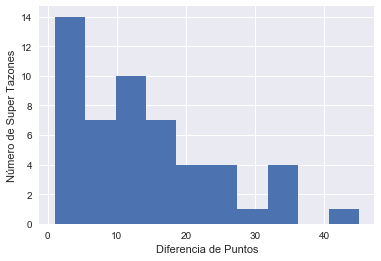

In [5]:
# Graficar un histograma de la diferencia de puntos
plt.hist(super_tazones['difference_pts'])
plt.xlabel('Diferencia de Puntos')
plt.ylabel('Número de Super Tazones')
plt.show()

In [6]:
# Mostrar los juego más cerrados y las derrotas más grandes
display(super_tazones[super_tazones['difference_pts'] == 1])
display(super_tazones[super_tazones['difference_pts'] >= 35])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


## 5. Las grandes derrotas (reventones) se traducen en pérdida de espectadores?

<p> La gran mayoría de los Super Tazones son juegos cerrados. Tiene sentido. Es probable que ambos equipos se lo merezcan si han llegado tan lejos. El juego más cerrado fue cuando los Buffalo Bills perdieron ante los Gigantes de Nueva York por 1 punto en 1991, lo cual fue mejor recordado por el intento de gol de campo fallido de Scott Norwood en el último segundo que fue <em> <a href = "https://www.youtube.com/watch?v=RPFZCGgjDSg"> ancho a la derecha </a> </em>, iniciando cuatro derrotas consecutivas en el Super Tazón. Pobre Scott. La mayor discrepancia de puntos fue de 45 puntos (!) donde el miembro del Salón de la Fama Joe Montana llevó a los San Francisco 49ers a la victoria en 1990, un año antes del juego más cerrado. </p>

<p> Recuerdo haber visto a los Seahawks aplastar a los Broncos por 35 puntos (43-8) en 2014, lo cual fue una experiencia aburrida en mi opinión. El juego nunca estuvo realmente cerca. Estoy bastante seguro de que cambiamos el canal al final del tercer trimestre. Combinemos nuestros datos de juego y TV para ver si este es un fenómeno universal. ¿Las grandes diferencias de puntos se traducen en espectadores perdidos? Podemos trazar <a href="https://en.wikipedia.org/wiki/Nielsen_ratings"> participación familiar</a><em> (household share: porcentaje promedio de hogares estadounidenses con un televisor en uso que estaban viendo toda la transmisión ) </em> vs. diferencia de puntos para averiguarlo. </p>

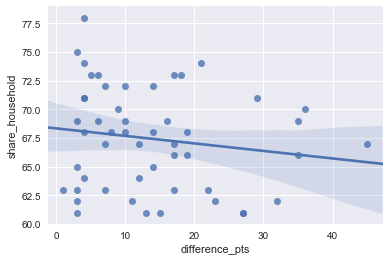

In [7]:
# Unir los datos de juego y de TV, dejando por fuera el I Super Tazón porque se transmitió a través de dos cadenas
juegos_tv = pd.merge(tv[tv['super_bowl']>1], super_tazones, on='super_bowl')

# Importar seaborn
import seaborn as sns

# Crear un diagrama de dispersión con una linea de regresión ajustada
sns.regplot(x='difference_pts',y='share_household', data=juegos_tv)

## 6. La audiencia y la industria de anuncios a través del tiempo

<p> La línea de regresión con pendiente descendente y el intervalo de confianza del 95% para esa regresión <em> sugieren </em> que es común abandonar el juego si se trata de una derrota aplastante. Aunque concuerda con nuestra intuición, debemos tomarlo con cautela porque la relación lineal en los datos es débil debido a nuestro pequeño tamaño de muestra de 52 juegos. </p>

<p> Sin embargo, independientemente de la puntuación, apuesto a que la mayoría de la gente se queda para el espectáculo de medio tiempo, lo cual es una buena noticia para las cadenas de televisión y los anunciantes. Un espacio de 30 segundos cuesta bastante <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1"> $ 5 millones</a> ahora, pero ¿siempre ha sido así? ¿Y cómo han evolucionado el número de espectadores y los <i>ratings</i> de los hogares junto con el costo de los anuncios? Podemos descubrirlo usando gráficos de líneas que comparten un eje x "Super Tazón". </p>

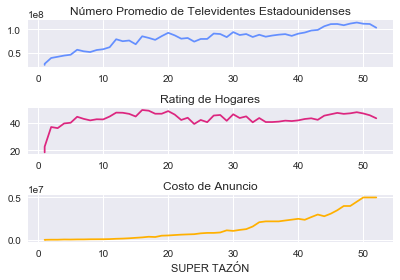

In [8]:
# Crear un gráfico con 3x1 subfiguras y activar el gráfico superior
plt.subplot(3,1,1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Número Promedio de Televidentes Estadounidenses')

# Activar el gráfico medio
plt.subplot(3,1,2)
plt.plot(tv['super_bowl'], tv['rating_household'], color='#DC267F')
plt.title('Rating de Hogares')

# Activar el gráfico inferior
plt.subplot(3,1,3)
plt.plot(tv['super_bowl'], tv['ad_cost'], color='#FFB000')
plt.title('Costo de Anuncio')

plt.xlabel('SUPER TAZÓN')

# Mejorar el espaciado entre subgráficos
plt.tight_layout()

## 7. Los espectáculos de medio tiempo no fueron siempre tan espectaculares


<p> Podemos ver que los espectadores aumentaron antes que los costos publicitarios. ¿Quizás las cadenas televisivas no eran muy conocedoras de datos y reaccionaron lentamente? Tiene sentido. </p>
<p> Otra hipótesis: ¿Quizás los espectáculos de medio tiempo no fueron tan buenos en los años anteriores? El espectáculo moderno del Super Tazón tiene mucho que ver con el prestigio cultural de los grandes actos de medio tiempo. Investigué en YouTube y resultó que los viejos no estaban a la altura de los estándares actuales. Algunos son: </p>

<ul>
<li><a href="https://youtu.be/6wMXHxWO4ns?t=263"> XXVI Super Tazón </a> en 1992: un rap de Frosty El Hombre de Nieve realizado por niños. </li>
<li><a href="https://www.youtube.com/watch?v=PKQTL1PYSag"> XXIII Super Tazón </a> en 1989: un imitador de Elvis que hizo trucos de magia y ni siquiera cantó una canción de Elvis. </li>
<li><a href="https://youtu.be/oSXMNbK2e98?t=436"> XXI Super Tazón </a> en 1987: ponis bailando. </li>
</ul>

<p> Resulta que la actuación del XXVII Super Tazón de Michael Jackson, uno de los eventos más vistos en la historia de la televisión estadounidense, fue cuando la NFL se dio cuenta del valor del tiempo aire del Super Tazón y decidió que debían firmar actos de renombre a partir de ese momento. Los espectáculos de medio tiempo antes de MJ no fueron tan impresionantes, lo que podemos ver al filtrar nuestros datos de (<code>musicos_mediotiempo</code>). </p>

In [9]:
# Muestra los músicos de medio tiempo del Super Tazón hasta e incluyendo el XXVII Super Tazón
musicos_mediotiempo[musicos_mediotiempo['super_bowl'] <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## 8. ¿Quién tiene la mayor cantidad de apariciones en el medio tiempo?

<p> Muchas bandas de música. El clarinetista de jazz estadounidense Pete Fountain. Miss Texas 1973 tocando un violín. Nada en contra de esos artistas, simplemente no son <a href="https://www.youtube.com/watch?v=suIg9kTGBVI"> Beyoncé </a>. Para ser justos, nadie lo es. </p>
<p> Veamos a todos los músicos que han hecho más de un espectáculo de medio tiempo, incluido su recuento de actuaciones.</p>

In [10]:
# Contar las apariciones en medio tiempo por cada músico y ordenar de mayor a menor
apariciones_mediotiempo = musicos_mediotiempo.groupby('musician')['super_bowl'].count().reset_index()
apariciones_mediotiempo = apariciones_mediotiempo.sort_values('super_bowl', ascending=False)

# Mostrar a los músicos con más de una aparición
apariciones_mediotiempo[apariciones_mediotiempo['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## 9. ¿Quién interpretó la mayor cantidad de canciones en el show de medio tiempo?


<p> La mundialmente famosa <a href="https://www.youtube.com/watch?v=RL_3oqpHiDg">Grambling State University Tiger Marching Band</a> se lleva la corona con seis apariciones. Beyoncé, Justin Timberlake, Nelly y Bruno Mars son los únicos músicos post-Y2K con múltiples apariciones (dos cada uno). </p>
<p> De nuestras inspecciones anteriores, la columna <code>num_songs</code> (cantidad de canciones) tiene muchos valores faltantes: </p>
<ul>
<li> Muchas de las bandas de música no tienen registradas <code>num_songs</code>. </li>
<li> Para las bandas no-marchantes, los datos faltantes comienzan a ocurrir en el XX Super Tazón. </li>
</ul>
<p> Filtremos las bandas de música dejando por fuera a los músicos con la palabra "Marching" ("Marchando") en ellos y la palabra "Spirit" ("Espíritu") (una nomenclatura común para las bandas marchantes es "Espíritu de [algo]"). Luego filtraremos los Super Tazones después del XX Super Tazón para abordar el problema de datos faltantes, <em> luego </em> veamos quién tiene la mayor cantidad de canciones. </p>

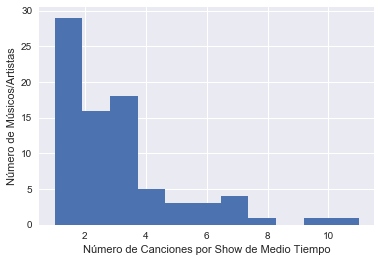

In [11]:
# Dejar por fuera la mayor cantidad de bandas marchantes
sin_bandas = musicos_mediotiempo[~musicos_mediotiempo['musician'].str.contains('Marching')]
sin_bandas = sin_bandas[~sin_bandas['musician'].str.contains('Spirit')]

# Graficar el histograma del número de canciones por espectáculo
mayor_canciones = int(max(sin_bandas['num_songs'].values)) #sin_bandas['num_songs'].values arroja un arreglo ordenado
plt.hist(sin_bandas['num_songs'].dropna(), bins=mayor_canciones)
plt.xlabel('Número de Canciones por Show de Medio Tiempo')
plt.ylabel('Número de Músicos/Artistas')
plt.show()

In [12]:
sin_bandas['num_songs'].values

array([11.,  7.,  6.,  3.,  3.,  1.,  3.,  3.,  8.,  1.,  3.,  6.,  1.,
        7.,  2.,  1.,  1.,  5.,  1.,  1.,  1.,  2.,  6.,  1.,  1.,  1.,
        1.,  5.,  4.,  4.,  7.,  3.,  4.,  1.,  3.,  3.,  1.,  2.,  1.,
        2.,  2.,  1.,  3.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        3.,  4.,  1.,  3.,  3.,  2.,  4.,  2.,  3.,  3.,  3., 10.,  3.,
        2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  5.,  2.,  2.,  1.,  1.,
        1., nan, nan,  7.,  2., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [13]:
# Ordenar sin_bandas por el número de canciones por aparición ...
sin_bandas = sin_bandas.sort_values('num_songs', ascending=False)

#... congigurar el Músico como índice y dejar solamente el número de canciones como columna
sin_bandas = sin_bandas[['musician','num_songs']].set_index('musician')

#... y mostrar el top 15
display(sin_bandas.head(15))

,num_songs
musician,
Justin Timberlake,11.0
Diana Ross,10.0
Katy Perry,8.0
Lady Gaga,7.0
Elvis Presto,7.0
Prince,7.0
Beyoncé,7.0
Bruno Mars,6.0
Coldplay,6.0


## 10. Conclusión

<p> Así que la mayoría de los músicos que no pertenecen a la banda hacen 1-3 canciones por espectáculo de medio tiempo. Es importante tener en cuenta que la duración del espectáculo de medio tiempo es fija (aproximadamente 12 minutos), por lo que las canciones por actuación son más una medida de cuántas canciones exitosas tienes. Justin Timberlake estalló en 2018: 11 canciones!... Diana Ross ocupa el segundo lugar con 10 en su popurrí en 1996. </p>
<p> En esta <i>notebook</i>, cargamos, limpiamos y luego exploramos los datos del juego del Super Tazón, la televisión y el espectáculo de medio tiempo. Visualizamos las distribuciones de puntos combinados, diferencias de puntos y espectáculos de medio tiempo usando histogramas. Utilizamos gráficos de líneas para ver cómo los aumentos en el costo de los anuncios se retrasaron respecto de los aumentos de audiencia. Y descubrimos que las grandes derrotas parecen provocar una caída en los espectadores. </p>